In [41]:
#Importing the libraries 

from pyforest import *
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
%matplotlib inline

In [4]:
#Let's import the csv file

hab = pd.read_csv("Haberman's.csv")
hab.head()

<IPython.core.display.Javascript object>

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [126]:
hab.shape    # Now, we will check the number of rows and columns in our dataset

(306, 4)

In [5]:
hab.describe()   # Let's sumarize our mean, min, max, IQR. 

,Age,Op_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [6]:
hab.info()  #info gives us the information of the attributes. For ex, what is the attribute datatype, how many non-null values, how much memory it consumes and so on.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age            306 non-null int64
Op_Year        306 non-null int64
axil_nodes     306 non-null int64
Surv_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [7]:
hab.isnull().sum()      # Check if there are any null values.

Age            0
Op_Year        0
axil_nodes     0
Surv_status    0
dtype: int64

In [8]:
print(hab.Age.max())   # Whose age is max and min
print(hab.Age.min())

83
30


In [9]:
hab.loc[hab.Age == 83]  # Let's see if the most aged person survived or not and how many persons are of 83 years old.

,Age,Op_Year,axil_nodes,Surv_status
305,83,58,2,2


In [10]:
hab.loc[hab.Age == 30]   # Let's see if the youngest person survived or not and how many persons are of 30 years old.

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1


In [11]:
hab.Surv_status.value_counts()  # How many survived and how many died?

1    225
2     81
Name: Surv_status, dtype: int64

In [12]:
hab.axil_nodes.value_counts()  # count of axil_nodes.

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: axil_nodes, dtype: int64

In [14]:
print(hab.Op_Year.max())  # Max and Min Op_Year
print(hab.Op_Year.min())

69
58


Let's prepare a bar chart wrt age to see how many survived 

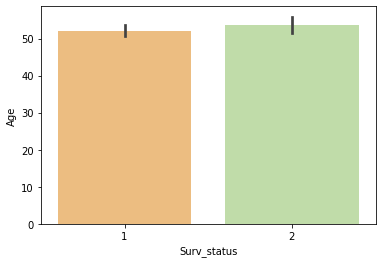

In [76]:
sns.barplot(x='Surv_status', y='Age', data=hab, palette='Spectral')
plt.show()

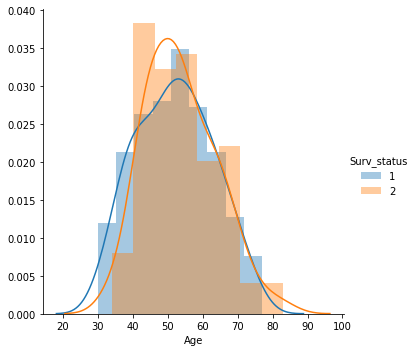

In [59]:
sns.FacetGrid(hab, hue='Surv_status', height=5)  \
   .map(sns.distplot, 'Age') \
   .add_legend()

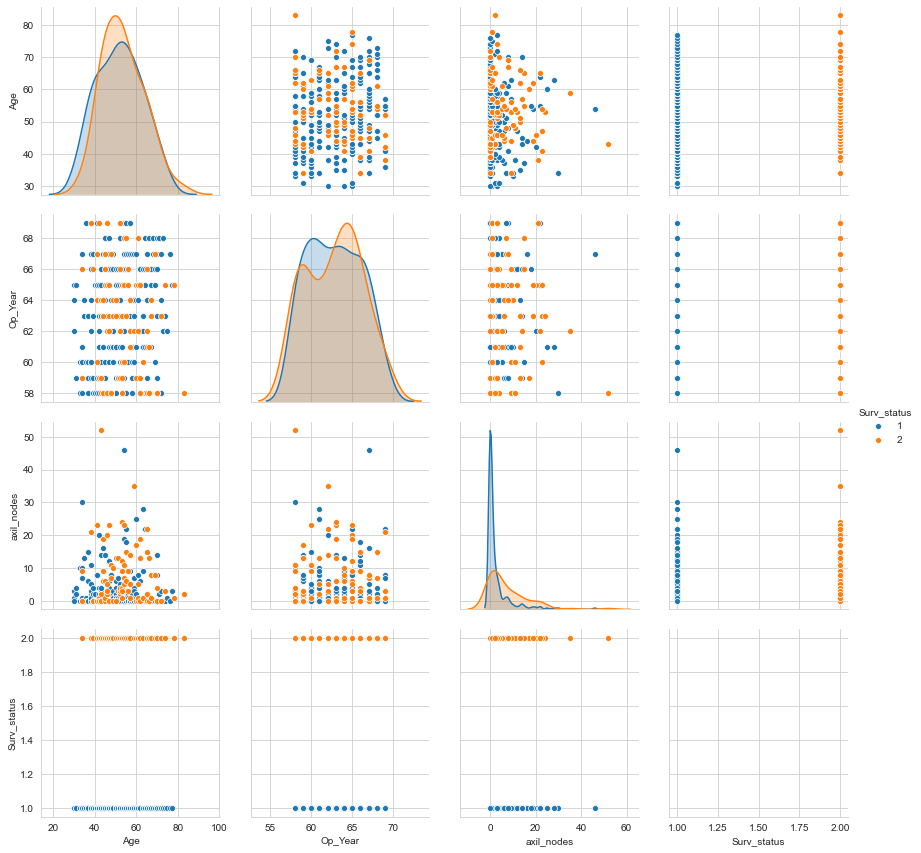

In [77]:
sns.set_style('whitegrid')
sns.pairplot(hab, hue='Surv_status', size=3)
plt.show()

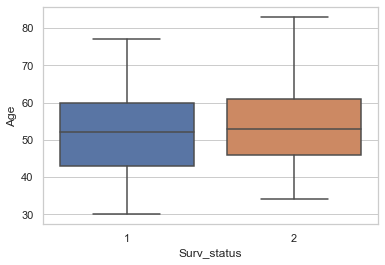

In [106]:
sns.boxplot(x='Surv_status', y='Age', data=hab)

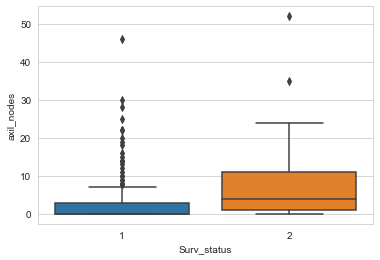

In [98]:
sns.boxplot(x='Surv_status', y='axil_nodes', data=hab)

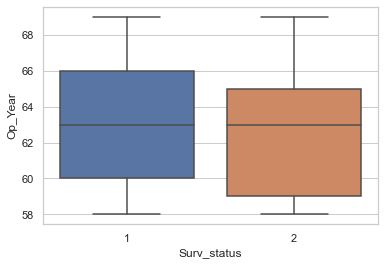

In [107]:
sns.boxplot(x='Surv_status', y='Op_Year', data=hab)

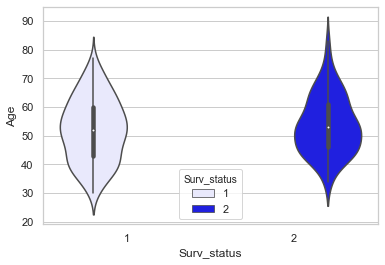

In [128]:
sns.violinplot(x='Surv_status', y='Age', hue='Surv_status', data=hab, color='blue', inner='box')

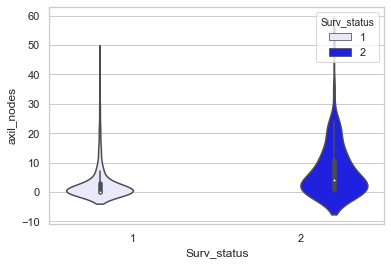

In [129]:
sns.violinplot(x='Surv_status', y='axil_nodes', hue='Surv_status', data=hab, color='blue', inner='box')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

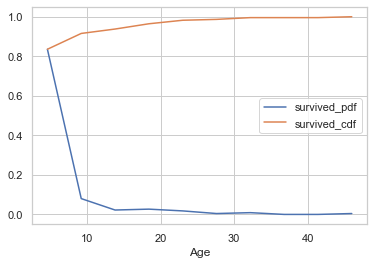

In [130]:
data_surv=hab.loc[hab['Surv_status']==1]
counts,bin_edges=np.histogram(data_surv['axil_nodes'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend('survival status')
plt.legend(['survived_pdf','survived_cdf'])
plt.xlabel('Age')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

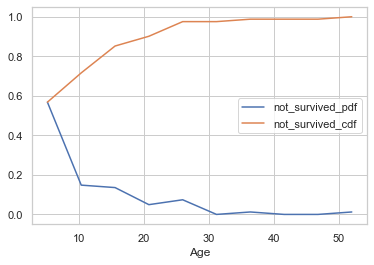

In [131]:
data_surv=hab.loc[hab['Surv_status']==2]
counts,bin_edges=np.histogram(data_surv['axil_nodes'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend('survival status')
plt.legend(['not_survived_pdf','not_survived_cdf'])
plt.xlabel('Age')
plt.show()

In [114]:
import plotly.express as px
fig = px.scatter_3d(hab, x='axil_nodes',y='Op_Year',z='Age', color='Surv_status', size='Op_Year', size_max=25)
fig.show()

Now, let's create a pie chart about how much percent of people survived and how much died

In [117]:
trace = go.Pie(labels = hab["Surv_status"].value_counts().keys().tolist(),
               values = hab["Surv_status"].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue','lime'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Survival and Death Percentage",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
hab['Surv_status'].describe()

count    306.000000
mean       1.264706
std        0.441899
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Surv_status, dtype: float64

In [124]:
hab['Age'].describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: Age, dtype: float64

In [125]:
hab['axil_nodes'].describe()

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: axil_nodes, dtype: float64

Correlation Matrix will give us an idea about which attribute has a strong correlation with which attribute.

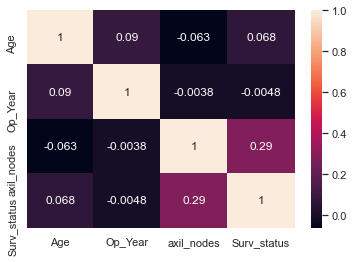

In [132]:
corrMatrix = hab.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()